Одна очень известная международная компания X, занимающаяся инвестициями в криптовалюту и блокчейн решила попробовать заняться инвестициями в набирающую популярность область невзаимозаменяемых токенов (NFT), и она требует выделить разные группы NFT, которые имеют большой шанс на успех, и наименее интересные наборы NFT.

In [1]:
import pandas as pd # нужен
import matplotlib.pyplot as plt # нужен
from ipywidgets import interact, interactive, fixed, interact_manual # не помню для чего
import ipywidgets as widgets # по моему ообще не используется
import seaborn as sns # нужен
import numpy as np # нужен
import math # по моему не используется
from sklearn import datasets, linear_model, model_selection # по моему не используется
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix # по моему не используется
from sklearn.metrics import classification_report # по моему не используется
from sklearn.preprocessing import MinMaxScaler # кажется не используется
from sklearn.model_selection import train_test_split # в кластеризации и классфиикации
from sklearn.metrics.pairwise import euclidean_distances # кластеризации
from sklearn.cluster import Birch # кластеризация
from sklearn.ensemble import RandomForestClassifier # классификация
from sklearn.svm import SVC # классификация
from sklearn.neighbors import KNeighborsClassifier # классификация

path = (r'/home/ivan/Data_science/NFT/NFT_Top_Collections.csv') # Импортируем данные
nft = pd.read_csv(path) # Читаем данные
nft = nft.dropna(axis = 0)

In [2]:
# Инициировали всё, удалили плохие данные

In [3]:
# Смотрим что осталось

In [4]:
nft

,Index,Name,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio,Category,Website,Logo
0,0,basis.markets,27256.63,4.001818e+06,708.145455,103969.915600,366,39.50,5799.3900,74.471667,10933.930100,12,16,75.00,"Collectibles,Digital,Privilege",https://basis.markets/,https://content.solsea.io/files/thumbnail/1636...
5,5,I'M AIKO,2904.70,4.264681e+05,2530.877143,371583.382100,1411,1.20,176.1840,2.058611,302.245254,599,1206,49.67,"Art,Collectibles,Graphics,2D,Image",https://aiko.io,https://content.solsea.io/files/thumbnail/1633...
9,9,Meta Waifus,1844.59,2.708227e+05,989.491267,145277.107800,1156,1.27,186.4614,1.595666,234.275695,376,643,58.48,"3D,PFP,Metaverse,Art,Collectibles",https://metawaifus.com,https://content.solsea.io/files/thumbnail/1637...
12,12,Hot Bunnies NFT,1590.89,2.335745e+05,527.850000,77498.937000,412,1.00,146.8200,3.861383,566.928325,243,391,62.15,"Digital,Metaverse,Art,Picture,Image",https://hotbunniesnft.com/,https://content.solsea.io/files/thumbnail/1637...
13,13,BOSS BULLS ™ CLUB,1236.33,1.815180e+05,244.686667,35924.896400,370,1.49,218.7618,3.341432,490.589110,99,127,77.95,"Art,Digital,PFP,3D",https://www.bossbullsclub.com,https://content.solsea.io/files/thumbnail/1637...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,575,META OCEAN BOX,2.65,3.890730e+02,4.095455,601.294636,11,0.20,29.3640,0.240909,35.370273,13,17,76.47,"Digital,3D,2D,Graphics,Metaverse",https://www.MetaOceanBox.com/,https://content.solsea.io/files/thumbnail/1641...
578,584,Cannababy Society,1.00,1.468200e+02,13.000000,1908.660000,1,1.00,146.8200,1.000000,146.820000,1,13,7.69,"Digital,Metaverse,Collectibles,Art,3D",https://www.everythingnft.online/cannababy,https://content.solsea.io/files/thumbnail/1642...
579,585,Mountain Lionz,1.00,1.468200e+02,5.916667,868.685000,12,0.09,13.2138,0.083333,12.235000,49,71,69.01,"Collectibles,Art",https://www.mountainlionz.com,https://content.solsea.io/files/thumbnail/1641...
580,586,AI Motion Art,0.70,1.027740e+02,0.000000,0.000000,1,0.50,73.4100,0.700000,102.774000,6,24,25.00,"Digital,Physical,Art,Painting",https://aimotionart.com,https://content.solsea.io/files/thumbnail/1634...


Полученные данные были взяты с сайта coinmarketcap.com, и были собраны в один датасет и выложены в общий доступ на kaggel.com. Формат данных *.csv. Набор исследуемых данных, без предварительной обработки составляет 587 строк и 17 колонок, содержащие всю необходимую информацию для оценки, например, название, объем торгов, капитализация, продажи, количество NFT в коллекции и другие, более подробная информация с описанием данных находится ниже. 
    • Index: Индекс в файле;
    • Name: Имя NFT коллекции;
    • Volume: Объем продаж из NFT коллекции в Solana (SOL);
    • Volume_USD: Объем продаж из NFT коллекции в Долларах США (USD).
    • Market_Cap: Рыночная капитализация – итоговое количество предметов NFT находящихся в коллекции, которые находятся в обороте – в Solana (SOL).
    • MarketCapUSD: Рыночная капитализация – итоговое количество предметов NFT находящихся в коллекции, которые находятся в обороте – в Долларах США (USD);
    • Sales: Количество продаж из коллекции NFT;
    • Floor_Price: Минимальная цена за любое NFT из коллекции в Solana (SOL);
    • FloorPriceUSD: Минимальная цена за любое NFT из коллекции в Долларах США (USD);
    • Average_Price: Средняя цена за любое NFT из коллекции в Solana (SOL);
    • AveragePriceUSD: Средняя цена за любое NFT из коллекции в Долларах США (USD);
    • Owners: Количество владельцев NFT в коллекции;
    • Assets: Количество предметов в коллекции;
    • OwnerAssetRatio: Процент владения всеми предметами в коллекции;
    • Category: Категория NFT коллекции;
    • Website: Вебсайт NFT коллекции;
    • Logo: Изображение NFT коллекии.

И уже после предварительной обработки, были убраны строки, не содержащие данных или те строки, которые имели ошибку, их число значительно уменьшилось, до 238, это мало, но уже хоть что-то.

In [5]:
# Нормируем данные

In [6]:
nft["Sales"] = nft["Sales"]/nft["Sales"].max()
nft["Average_Price_USD"] = nft["Average_Price_USD"]/nft["Average_Price_USD"].max()
nft["Floor_Price_USD"] = nft["Floor_Price_USD"]/nft["Floor_Price_USD"].max()
nft["Owners"] = nft["Owners"]/nft["Owners"].max()
nft["Assets"] = nft["Assets"]/nft["Assets"].max()
nft["Owner_Asset_Ratio"] = nft["Owner_Asset_Ratio"]/nft["Owner_Asset_Ratio"].max()

In [7]:
# Смотрим что все прошло успешно

In [8]:
nft

,Index,Name,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio,Category,Website,Logo
0,0,basis.markets,27256.63,4.001818e+06,708.145455,103969.915600,0.073494,39.50,0.237866,74.471667,1.000000,0.005879,0.004819,0.7500,"Collectibles,Digital,Privilege",https://basis.markets/,https://content.solsea.io/files/thumbnail/1636...
5,5,I'M AIKO,2904.70,4.264681e+05,2530.877143,371583.382100,0.283333,1.20,0.007226,2.058611,0.027643,0.293484,0.363253,0.4967,"Art,Collectibles,Graphics,2D,Image",https://aiko.io,https://content.solsea.io/files/thumbnail/1633...
9,9,Meta Waifus,1844.59,2.708227e+05,989.491267,145277.107800,0.232129,1.27,0.007648,1.595666,0.021426,0.184223,0.193675,0.5848,"3D,PFP,Metaverse,Art,Collectibles",https://metawaifus.com,https://content.solsea.io/files/thumbnail/1637...
12,12,Hot Bunnies NFT,1590.89,2.335745e+05,527.850000,77498.937000,0.082731,1.00,0.006022,3.861383,0.051850,0.119059,0.117771,0.6215,"Digital,Metaverse,Art,Picture,Image",https://hotbunniesnft.com/,https://content.solsea.io/files/thumbnail/1637...
13,13,BOSS BULLS ™ CLUB,1236.33,1.815180e+05,244.686667,35924.896400,0.074297,1.49,0.008973,3.341432,0.044869,0.048506,0.038253,0.7795,"Art,Digital,PFP,3D",https://www.bossbullsclub.com,https://content.solsea.io/files/thumbnail/1637...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,575,META OCEAN BOX,2.65,3.890730e+02,4.095455,601.294636,0.002209,0.20,0.001204,0.240909,0.003235,0.006369,0.005120,0.7647,"Digital,3D,2D,Graphics,Metaverse",https://www.MetaOceanBox.com/,https://content.solsea.io/files/thumbnail/1641...
578,584,Cannababy Society,1.00,1.468200e+02,13.000000,1908.660000,0.000201,1.00,0.006022,1.000000,0.013428,0.000490,0.003916,0.0769,"Digital,Metaverse,Collectibles,Art,3D",https://www.everythingnft.online/cannababy,https://content.solsea.io/files/thumbnail/1642...
579,585,Mountain Lionz,1.00,1.468200e+02,5.916667,868.685000,0.002410,0.09,0.000542,0.083333,0.001119,0.024008,0.021386,0.6901,"Collectibles,Art",https://www.mountainlionz.com,https://content.solsea.io/files/thumbnail/1641...
580,586,AI Motion Art,0.70,1.027740e+02,0.000000,0.000000,0.000201,0.50,0.003011,0.700000,0.009400,0.002940,0.007229,0.2500,"Digital,Physical,Art,Painting",https://aimotionart.com,https://content.solsea.io/files/thumbnail/1634...


In [9]:
# Удаляем бесполезные колонки

In [10]:
# nft = nft.drop(columns = ["Category","Website", "Logo"],axis =1)

#nft.drop(nft[nft['Market_Cap_USD'] == 0.0].index, inplace = True) # удаляем нули здесь, потому что их тут много, но это не обязательно, топ НФТ можно построить и с ними)))

In [11]:
nft = nft.drop(columns = ["Volume","Market_Cap", "Average_Price", "Floor_Price","Website", "Logo", "Category"],axis =1)

In [12]:
# Проверяем

In [13]:
nft

,Index,Name,Volume_USD,Market_Cap_USD,Sales,Floor_Price_USD,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
0,0,basis.markets,4.001818e+06,103969.915600,0.073494,0.237866,1.000000,0.005879,0.004819,0.7500
5,5,I'M AIKO,4.264681e+05,371583.382100,0.283333,0.007226,0.027643,0.293484,0.363253,0.4967
9,9,Meta Waifus,2.708227e+05,145277.107800,0.232129,0.007648,0.021426,0.184223,0.193675,0.5848
12,12,Hot Bunnies NFT,2.335745e+05,77498.937000,0.082731,0.006022,0.051850,0.119059,0.117771,0.6215
13,13,BOSS BULLS ™ CLUB,1.815180e+05,35924.896400,0.074297,0.008973,0.044869,0.048506,0.038253,0.7795
...,...,...,...,...,...,...,...,...,...,...
569,575,META OCEAN BOX,3.890730e+02,601.294636,0.002209,0.001204,0.003235,0.006369,0.005120,0.7647
578,584,Cannababy Society,1.468200e+02,1908.660000,0.000201,0.006022,0.013428,0.000490,0.003916,0.0769
579,585,Mountain Lionz,1.468200e+02,868.685000,0.002410,0.000542,0.001119,0.024008,0.021386,0.6901
580,586,AI Motion Art,1.027740e+02,0.000000,0.000201,0.003011,0.009400,0.002940,0.007229,0.2500


In [14]:
# Смотрим на корреляцию. Корреляция проводится именно сейчас, потому что тот метод, которым логарифмируем значения, чтобы даные подчинялись НЗР, делает значения N/A и обрабатывает нули, и потом, метод для расчета евклидова расстояния не рабоатет, потому что не может быть расстояния <0.

In [15]:
nft.corr()

,Index,Volume_USD,Market_Cap_USD,Sales,Floor_Price_USD,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
Index,1.000000,-0.194681,-0.352059,-0.387925,-0.021775,-0.222767,-0.336481,-0.333560,-0.274713
Volume_USD,-0.194681,1.000000,0.336854,0.094460,0.217398,0.833787,0.050087,0.041804,0.089185
Market_Cap_USD,-0.352059,0.336854,1.000000,0.357250,0.025849,0.197482,0.387028,0.453841,-0.000741
Sales,-0.387925,0.094460,0.357250,1.000000,-0.034031,-0.026963,0.874261,0.840765,0.102533
Floor_Price_USD,-0.021775,0.217398,0.025849,-0.034031,1.000000,0.363359,-0.049177,-0.059221,0.059223
Average_Price_USD,-0.222767,0.833787,0.197482,-0.026963,0.363359,1.000000,-0.062952,-0.077243,0.038352
Owners,-0.336481,0.050087,0.387028,0.874261,-0.049177,-0.062952,1.000000,0.927723,0.137130
Assets,-0.333560,0.041804,0.453841,0.840765,-0.059221,-0.077243,0.927723,1.000000,-0.038661
Owner_Asset_Ratio,-0.274713,0.089185,-0.000741,0.102533,0.059223,0.038352,0.137130,-0.038661,1.000000


In [16]:
# Ничего не понятно, пострим наглядную тепловую карту

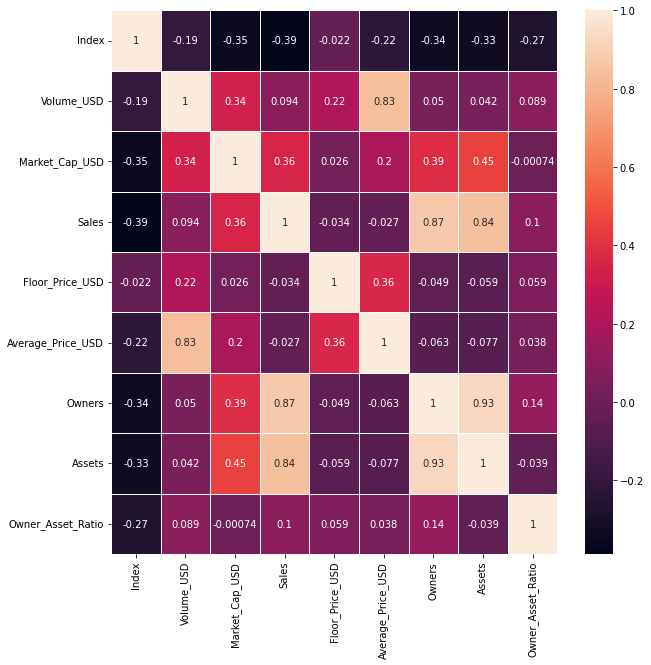

In [17]:
plt.subplots(figsize=(10,10))
sns.heatmap(nft.corr(),annot=True,linewidths = 1)
plt.show()

Очень много объектов, которые зависят друг от друга, но значение корреляции не такое большое, особенно для тех объектов которые по смыслу зависят друг от друга, поэтому здесь все более менее нормальные значения

In [18]:
# Смотрим описание данных

In [19]:
nft.describe()

,Index,Volume_USD,Market_Cap_USD,Sales,Floor_Price_USD,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
count,238.000000,2.380000e+02,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,293.617647,3.211288e+04,8734.269225,0.035940,0.010928,0.022247,0.030455,0.040611,0.482028
std,163.970541,2.617954e+05,29707.737700,0.101657,0.067724,0.076868,0.077916,0.085208,0.259900
min,0.000000,8.809200e+01,0.000000,0.000201,0.000120,0.000352,0.000490,0.000301,0.006200
25%,162.250000,1.299357e+03,0.000000,0.002861,0.000783,0.003651,0.003430,0.007530,0.270725
50%,289.500000,2.838765e+03,704.117811,0.008133,0.001807,0.008244,0.011514,0.016416,0.511550
75%,424.750000,1.002707e+04,5984.872600,0.024498,0.006022,0.016073,0.023885,0.035166,0.677175
max,587.000000,4.001818e+06,371583.382100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# Аналитика по "ящикам с усами"
# "Ящики с усами" это отличныый иструмент для того, чтобы посмотреть выбросы в наших данных более наглядным способом

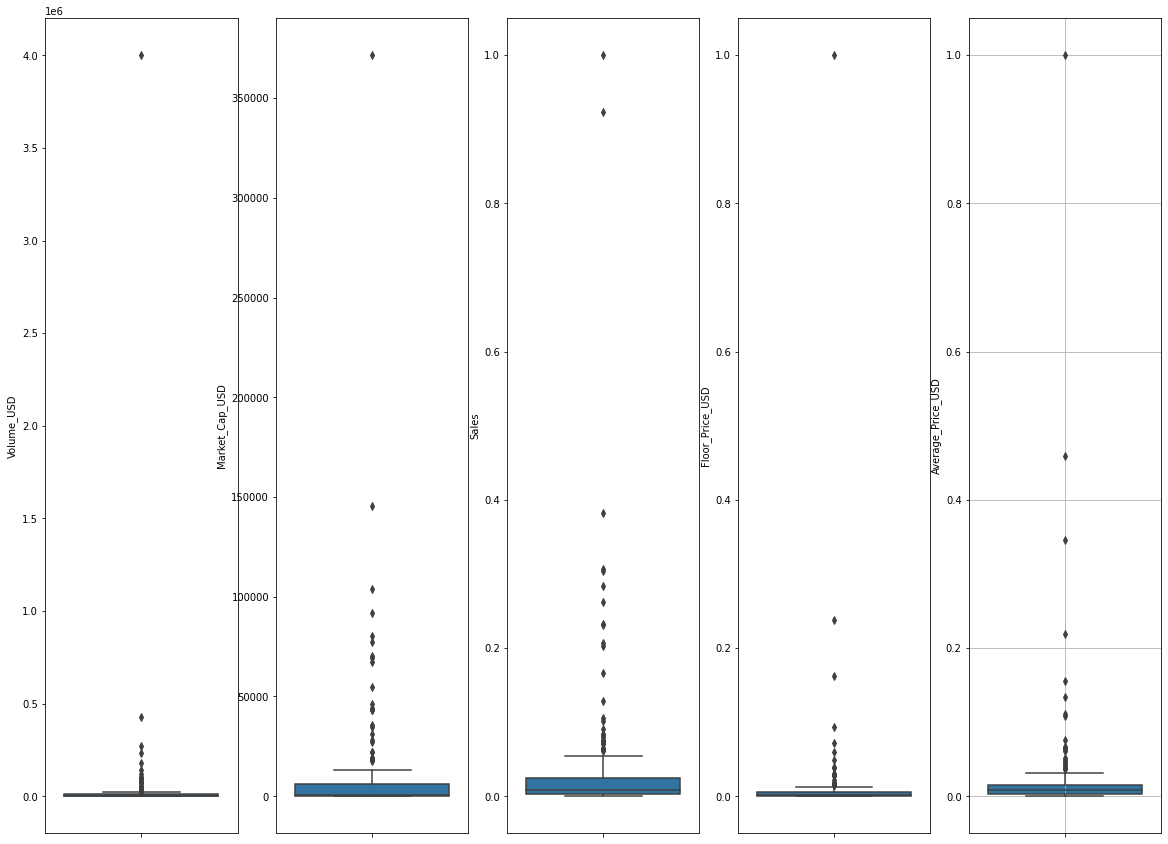

In [21]:
fig,ax = plt.subplots(1,5,figsize=(20,15))
sns.boxplot(y =nft.Volume_USD ,data = nft,ax = ax[0])
sns.boxplot(y =nft.Market_Cap_USD ,data = nft,ax = ax[1])
sns.boxplot(y =nft.Sales ,data = nft,ax = ax[2])
sns.boxplot(y =nft.Floor_Price_USD,data = nft,ax = ax[3])
sns.boxplot(y =nft.Average_Price_USD,data = nft,ax = ax[4])
plt.grid(True)
plt.show()

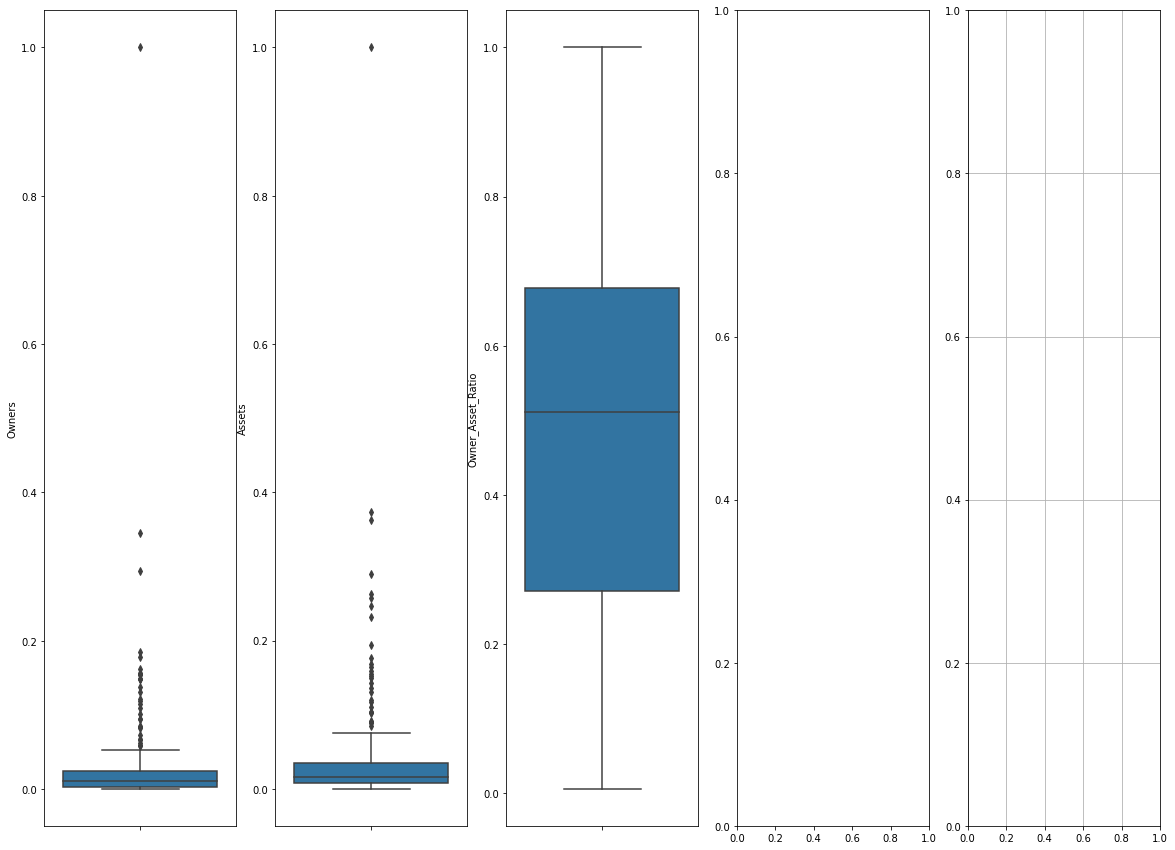

In [22]:
fig,ax = plt.subplots(1,5,figsize=(20,15))
sns.boxplot(y =nft.Owners,data = nft,ax = ax[0])
sns.boxplot(y =nft.Assets,data = nft,ax = ax[1])
sns.boxplot(y =nft.Owner_Asset_Ratio ,data = nft,ax = ax[2])
plt.grid(True)
plt.show()

По ящик с усами видно, что очень много данных имет выбросы, поэтому нам и надо эти значения прологорифмирвать в дальшейшем

In [23]:
# Сортируем данные, относительно рейтинга наборов NFT покупателей

In [24]:
new_index = nft.Owner_Asset_Ratio.sort_values(ascending = False).index.values
sorted_nft = nft.reindex(new_index)
sorted_nft.index = range(0,238)
top_nft = sorted_nft.loc[0:238]
top_nft

,Index,Name,Volume_USD,Market_Cap_USD,Sales,Floor_Price_USD,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
0,369,Kreechures,1744.2216,875.04720,0.002008,0.060219,0.015952,0.001960,0.001205,1.0000
1,489,Famous hot dog club,836.8740,0.00000,0.003213,0.006022,0.004784,0.000490,0.000301,1.0000
2,93,DazedDucks,24182.7222,9447.86700,0.013855,0.038540,0.032054,0.006369,0.003916,1.0000
3,168,Kingdom of Dwarves: Whitelist,8948.6790,0.00000,0.008835,0.015055,0.018601,0.001960,0.001205,1.0000
4,308,Scar Solciety,2554.6680,0.00000,0.005221,0.002710,0.008986,0.000980,0.000602,1.0000
...,...,...,...,...,...,...,...,...,...,...
233,250,MetaLand,4199.0520,34476.42695,0.003815,0.002409,0.020213,0.001470,0.046988,0.0192
234,384,Real Deal Xmas 2021,1615.0200,12920.16000,0.002209,0.006022,0.013428,0.000490,0.026506,0.0114
235,403,SOL CASH NFT,1468.2000,13213.80000,0.002008,0.006022,0.013428,0.000490,0.027108,0.0111
236,110,Lift-off Pass,18829.6650,0.00000,0.005422,0.028604,0.063783,0.000490,0.031928,0.0094


In [25]:
# Строим топ нфт, так как уже отсортировали

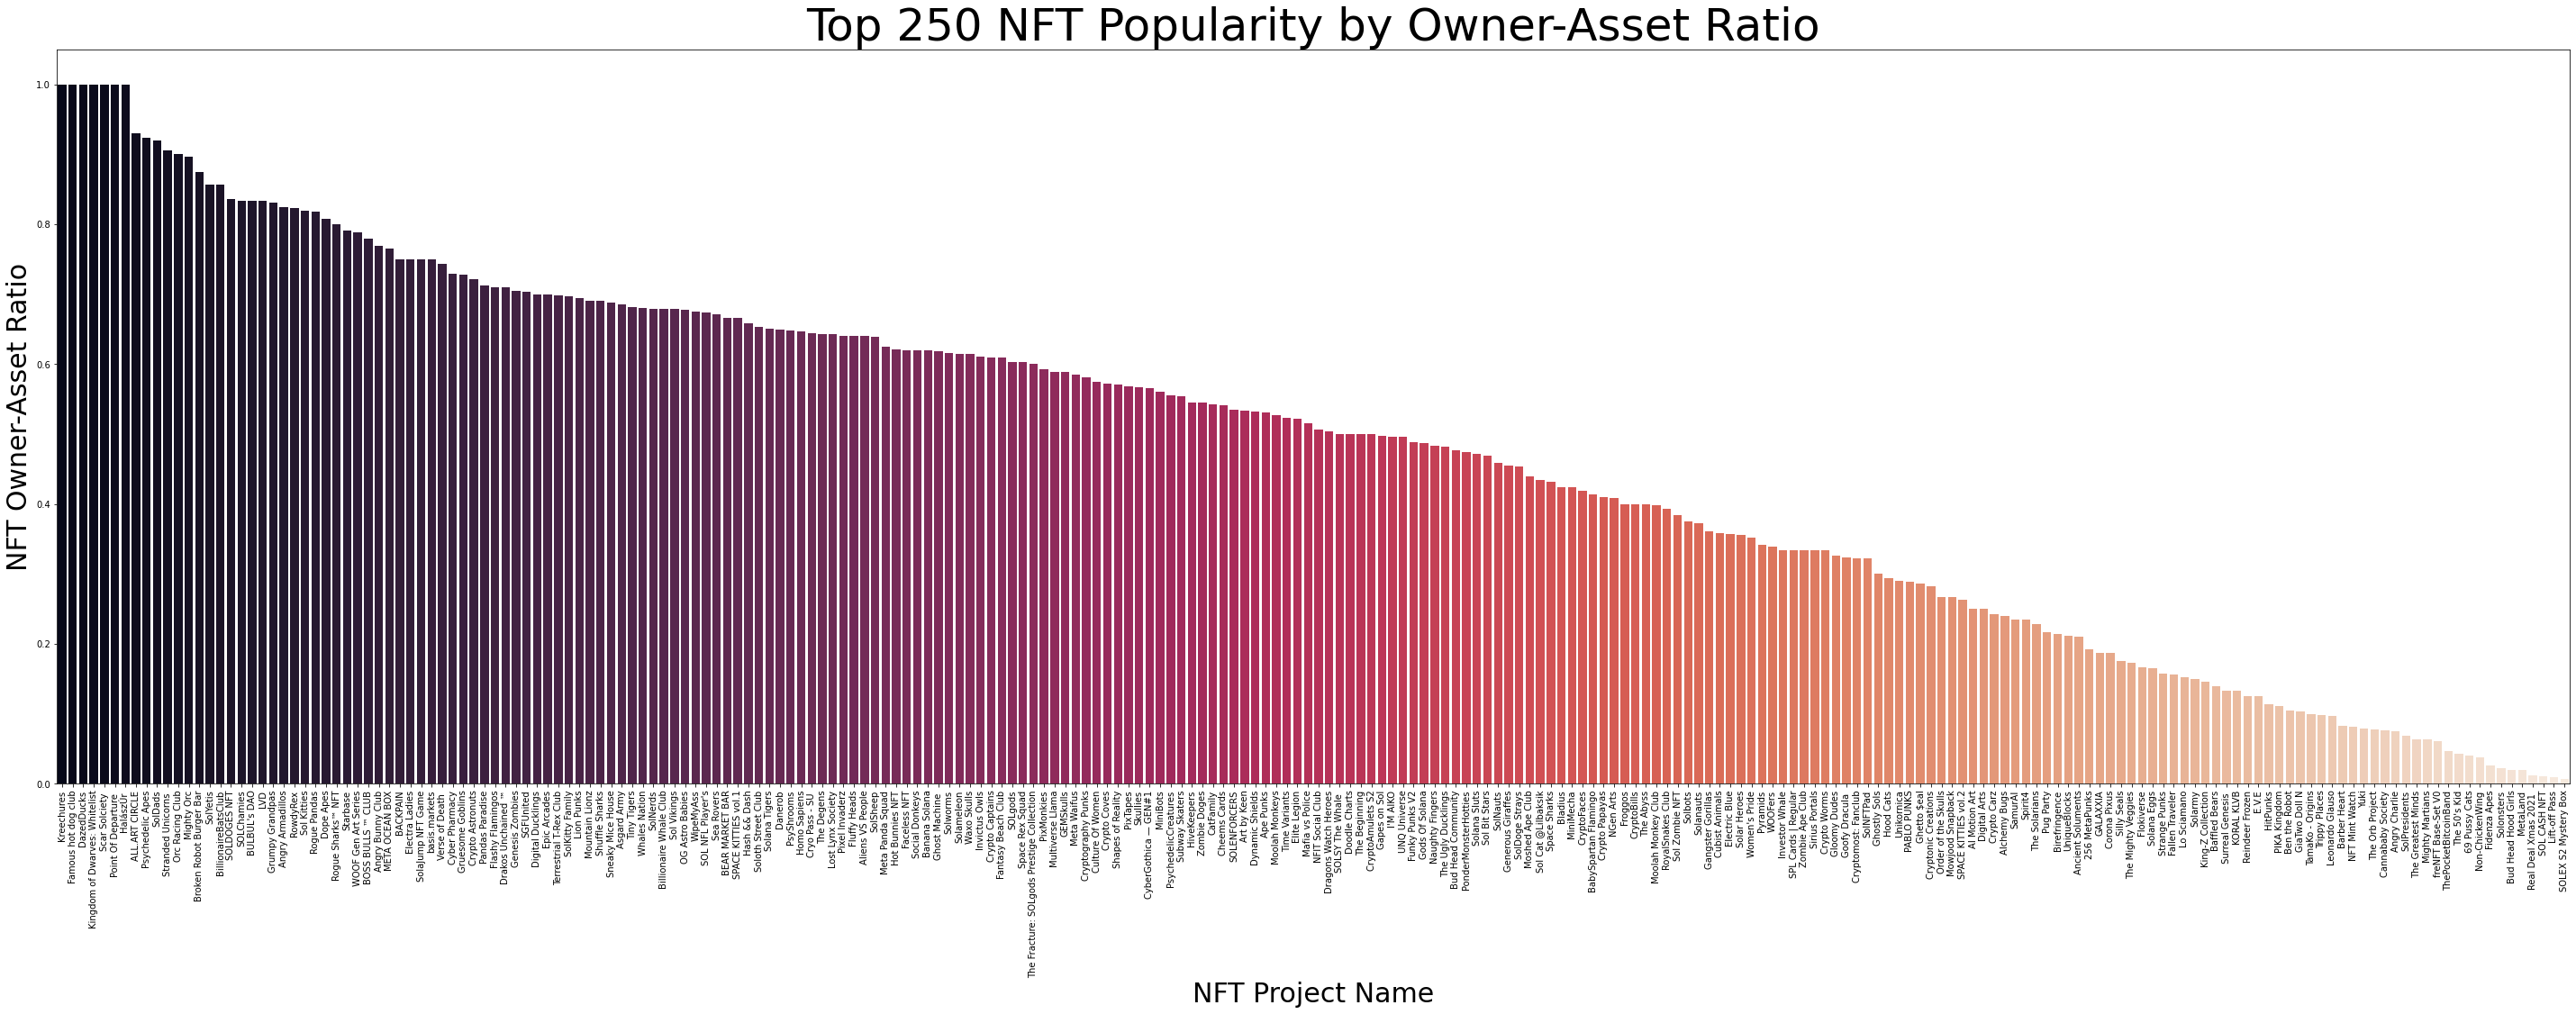

In [26]:
plt.subplots(figsize=(50,15))
sns.barplot(x=top_nft.Name,y=top_nft.Owner_Asset_Ratio.sort_values(),palette = "rocket")
plt.xticks(rotation = 90)
plt.xlabel("NFT Project Name",fontsize =30)
plt.ylabel("NFT Owner-Asset Ratio",fontsize =30)
plt.title("Top 250 NFT Popularity by Owner-Asset Ratio",fontsize =50)
plt.show()

In [27]:
# Ну и смотрим самые популярные наборы, по выбору покупателей

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


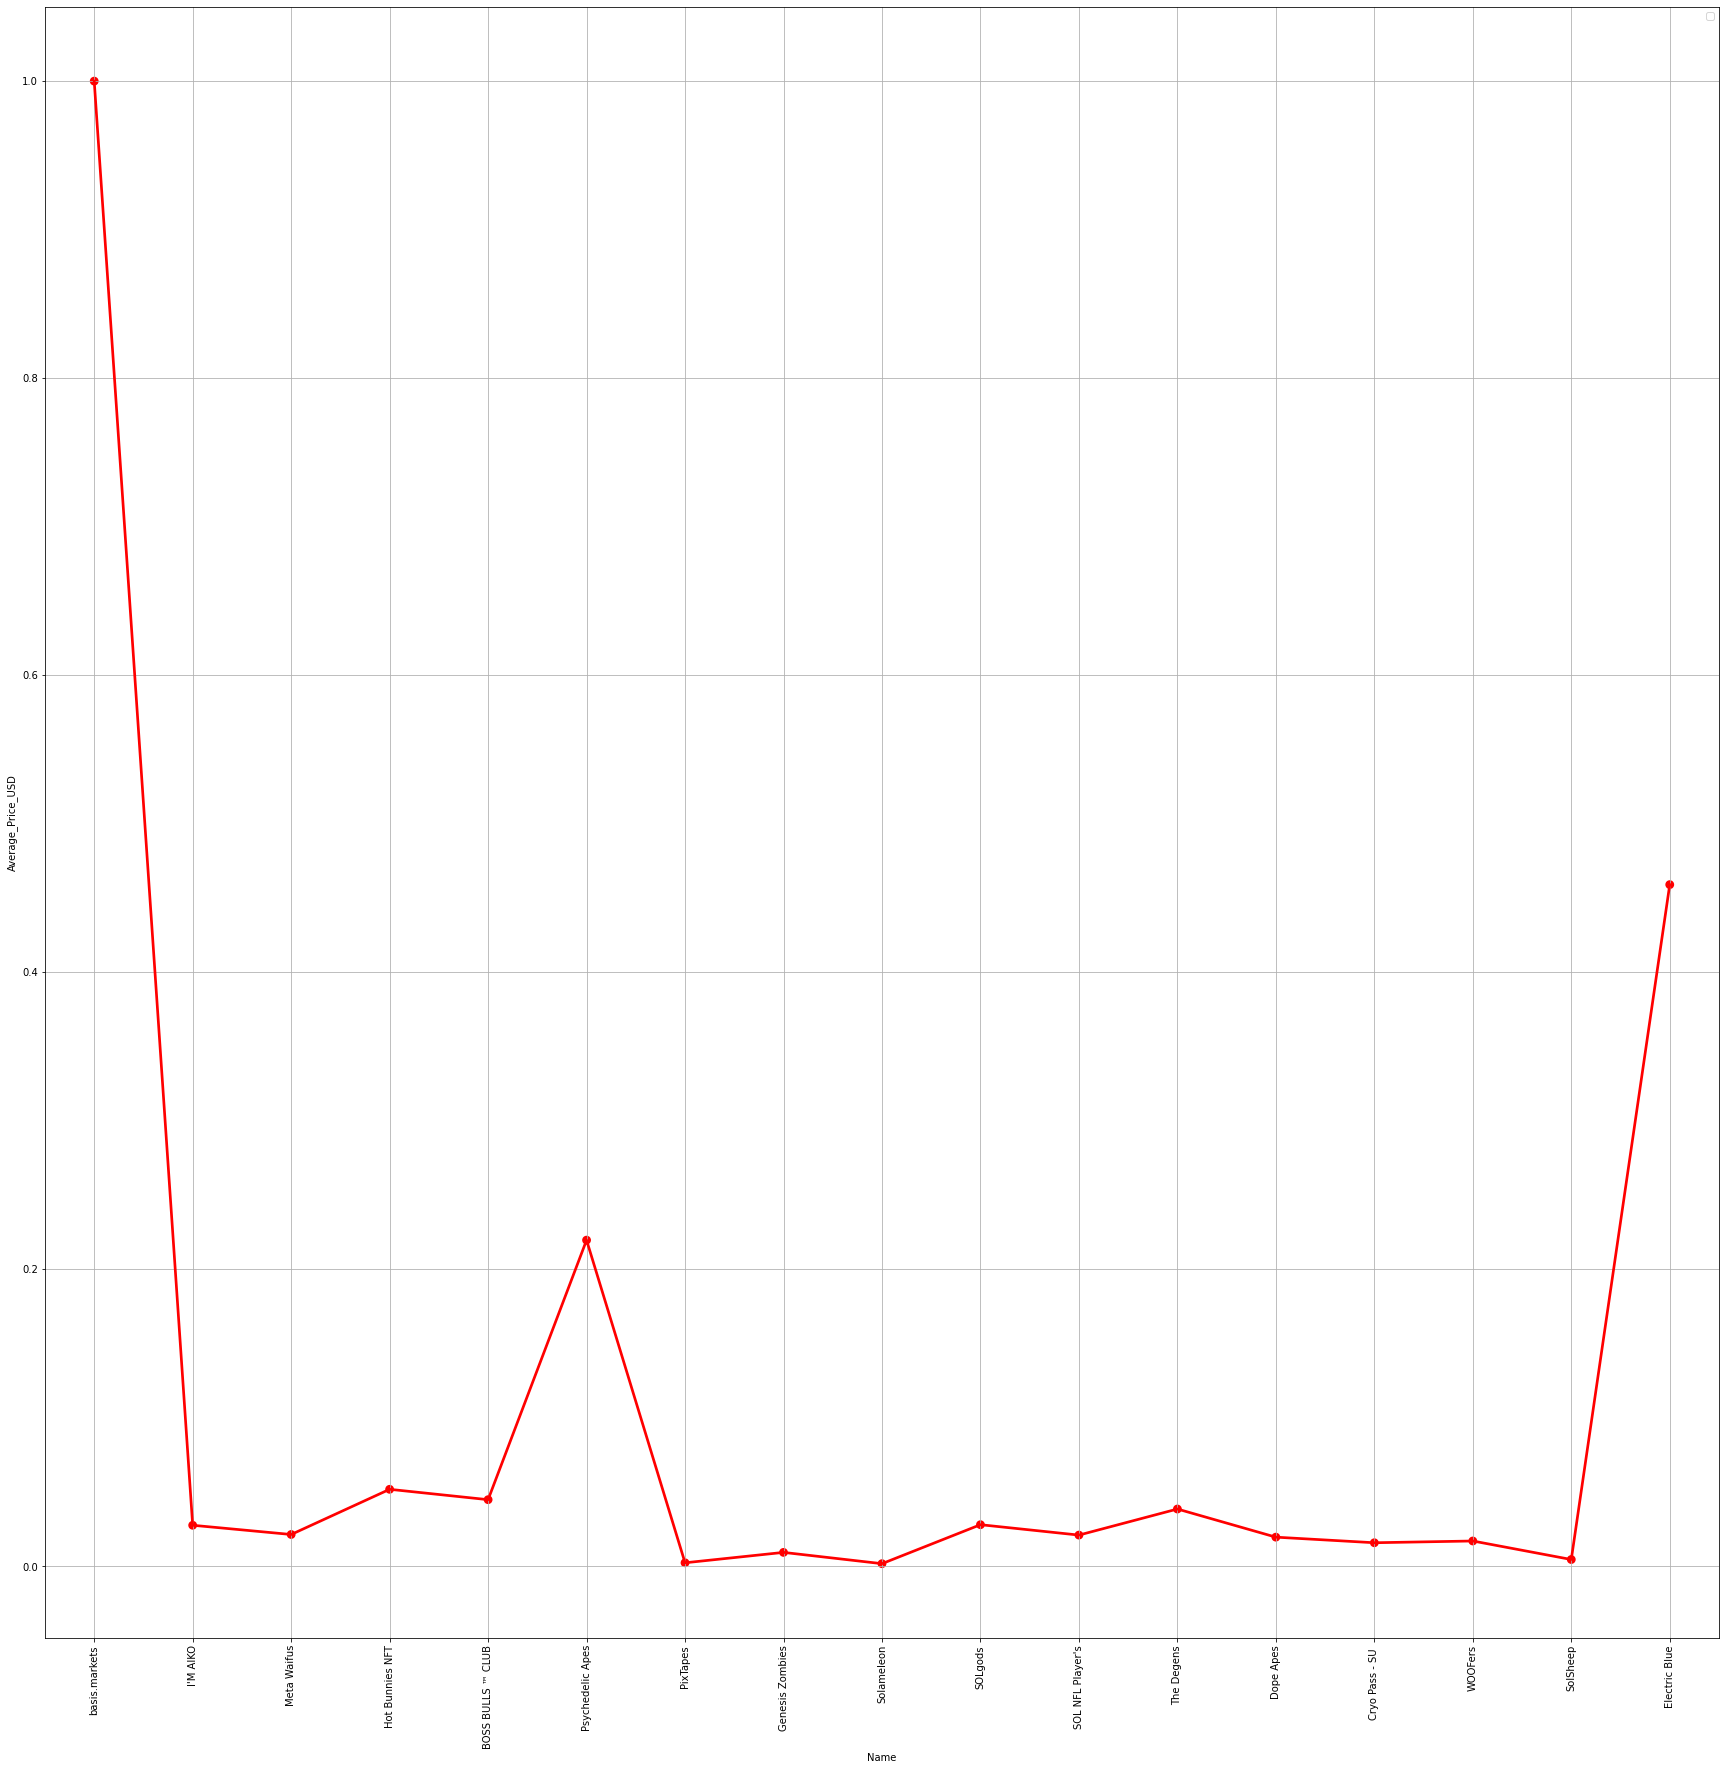

In [28]:
av_price_index = nft.Average_Price_USD.sort_values(ascending = False).index.values
floor_price_index = nft.Floor_Price_USD.sort_values(ascending = False).index.values
av_price_data = nft.reindex(av_price_index)
floor_price_data = nft.reindex(floor_price_index)

av_price_data.Average_Price_USD = av_price_data.Average_Price_USD/max(av_price_data.Average_Price_USD)
floor_price_data.Floor_Price_USD = floor_price_data.Floor_Price_USD/max(floor_price_data.Floor_Price_USD)
av_price_data = av_price_data.reindex(range(0,50))
floor_price_data = floor_price_data.reindex(range(0,50))
av_price_data = av_price_data.iloc[0:50]
floor_price_data = floor_price_data.iloc[0:50]

plt.subplots(figsize=(30,30))
sns.pointplot(x = "Name",y="Average_Price_USD",data =av_price_data,color="red" )
plt.grid(True)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [29]:
# Снова смотрим, ничего ли не натворили

In [30]:
nft

,Index,Name,Volume_USD,Market_Cap_USD,Sales,Floor_Price_USD,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
0,0,basis.markets,4.001818e+06,103969.915600,0.073494,0.237866,1.000000,0.005879,0.004819,0.7500
5,5,I'M AIKO,4.264681e+05,371583.382100,0.283333,0.007226,0.027643,0.293484,0.363253,0.4967
9,9,Meta Waifus,2.708227e+05,145277.107800,0.232129,0.007648,0.021426,0.184223,0.193675,0.5848
12,12,Hot Bunnies NFT,2.335745e+05,77498.937000,0.082731,0.006022,0.051850,0.119059,0.117771,0.6215
13,13,BOSS BULLS ™ CLUB,1.815180e+05,35924.896400,0.074297,0.008973,0.044869,0.048506,0.038253,0.7795
...,...,...,...,...,...,...,...,...,...,...
569,575,META OCEAN BOX,3.890730e+02,601.294636,0.002209,0.001204,0.003235,0.006369,0.005120,0.7647
578,584,Cannababy Society,1.468200e+02,1908.660000,0.000201,0.006022,0.013428,0.000490,0.003916,0.0769
579,585,Mountain Lionz,1.468200e+02,868.685000,0.002410,0.000542,0.001119,0.024008,0.021386,0.6901
580,586,AI Motion Art,1.027740e+02,0.000000,0.000201,0.003011,0.009400,0.002940,0.007229,0.2500


In [31]:
# В колонке Market_Cap_USD есть нули, поэтому удаляем и смотрим что осталось

In [32]:
nft.drop(nft[nft['Market_Cap_USD'] == 0.0].index, inplace = True)
nft.describe()

,Index,Volume_USD,Market_Cap_USD,Sales,Floor_Price_USD,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
count,132.000000,1.320000e+02,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,258.257576,5.171896e+04,15748.152088,0.056925,0.005896,0.020466,0.045488,0.060748,0.481675
std,165.569552,3.504612e+05,38540.562786,0.132360,0.022333,0.091825,0.101002,0.109215,0.243800
min,0.000000,8.809200e+01,151.462686,0.000201,0.000120,0.000352,0.000490,0.000904,0.006200
25%,112.750000,1.595566e+03,1393.256255,0.005572,0.000602,0.002376,0.005879,0.011747,0.322450
50%,237.500000,4.701176e+03,5265.350788,0.015261,0.001475,0.006534,0.016169,0.027711,0.529100
75%,387.500000,1.817558e+04,11103.262500,0.056426,0.004065,0.013565,0.038094,0.056325,0.645450
max,587.000000,4.001818e+06,371583.382100,1.000000,0.237866,1.000000,1.000000,1.000000,1.000000


In [33]:
# Все печально, данных, которые будем кластеризировать по методу очень мало

In [34]:
# Прибавляем индексам +1, так как не будет работать метод расчета евклидого расстояния

In [35]:
nft["Index"] = nft["Index"]+1
nft.describe()

,Index,Volume_USD,Market_Cap_USD,Sales,Floor_Price_USD,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
count,132.000000,1.320000e+02,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,259.257576,5.171896e+04,15748.152088,0.056925,0.005896,0.020466,0.045488,0.060748,0.481675
std,165.569552,3.504612e+05,38540.562786,0.132360,0.022333,0.091825,0.101002,0.109215,0.243800
min,1.000000,8.809200e+01,151.462686,0.000201,0.000120,0.000352,0.000490,0.000904,0.006200
25%,113.750000,1.595566e+03,1393.256255,0.005572,0.000602,0.002376,0.005879,0.011747,0.322450
50%,238.500000,4.701176e+03,5265.350788,0.015261,0.001475,0.006534,0.016169,0.027711,0.529100
75%,388.500000,1.817558e+04,11103.262500,0.056426,0.004065,0.013565,0.038094,0.056325,0.645450
max,588.000000,4.001818e+06,371583.382100,1.000000,0.237866,1.000000,1.000000,1.000000,1.000000


In [36]:
# Логарифмируем, потому что нормальное распределение очень плохое

In [37]:
nft["Market_Cap_USD"] = np.log(nft["Market_Cap_USD"])
nft["Volume_USD"] = np.log(nft["Volume_USD"])
nft["Sales"] = np.log(nft["Sales"])
nft["Average_Price_USD"] = np.log(nft["Average_Price_USD"])
nft["Floor_Price_USD"] = np.log(nft["Floor_Price_USD"])
nft["Owners"] = np.log(nft["Owners"])
nft["Assets"] = np.log(nft["Assets"])

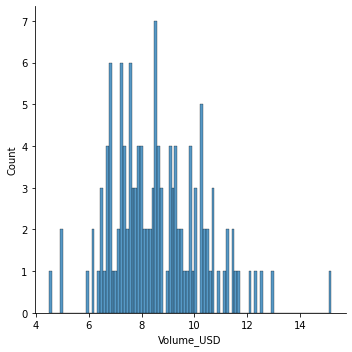

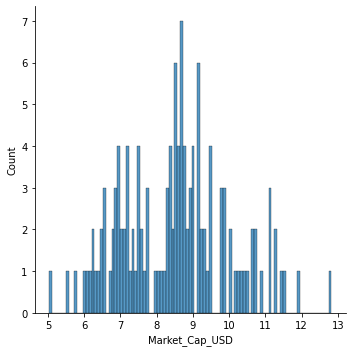

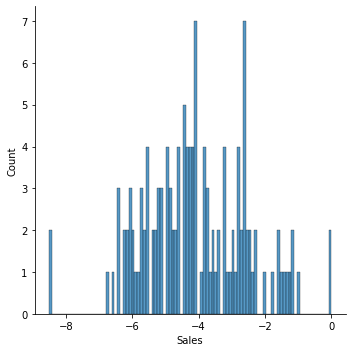

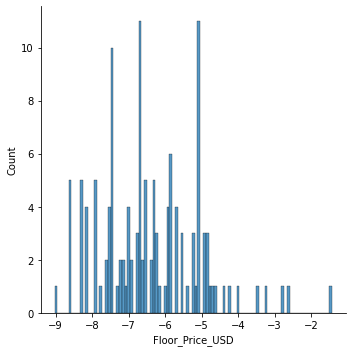

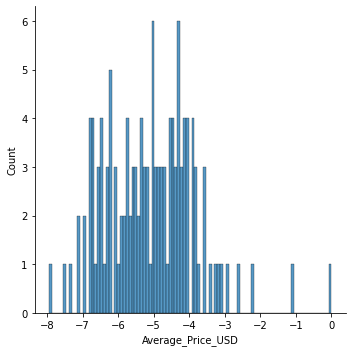

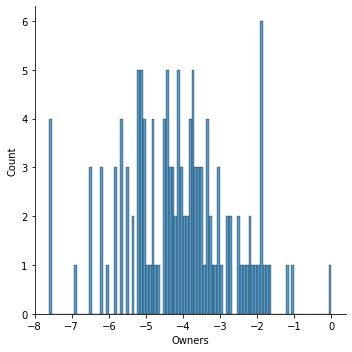

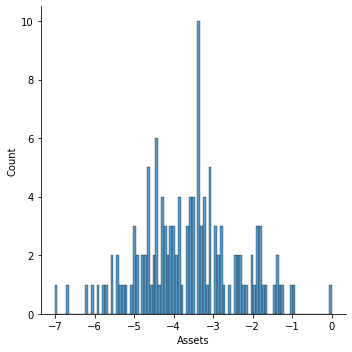

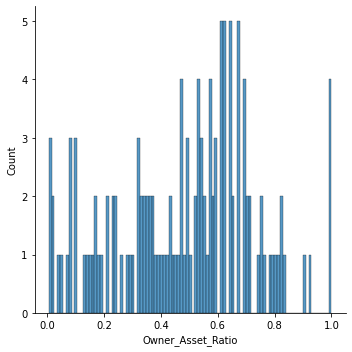

In [38]:
sns.displot(nft['Volume_USD'], bins = 99)
sns.displot(nft['Market_Cap_USD'], bins = 99)
sns.displot(nft['Sales'], bins = 99)
sns.displot(nft['Floor_Price_USD'], bins = 99)
sns.displot(nft['Average_Price_USD'], bins = 99)
sns.displot(nft['Owners'], bins = 99)
sns.displot(nft['Assets'], bins = 99)
sns.displot(nft['Owner_Asset_Ratio'], bins = 99)
plt.show()

Все прологарифмированные графики теперь подчиняются НЗР, теперь с данными реально можно работать


In [39]:
# Посмотрим теперь на графики зависимости переменных, у которых корреляция друг с другом достаточно большая, возможно мы увидим какую-то зависимость. 

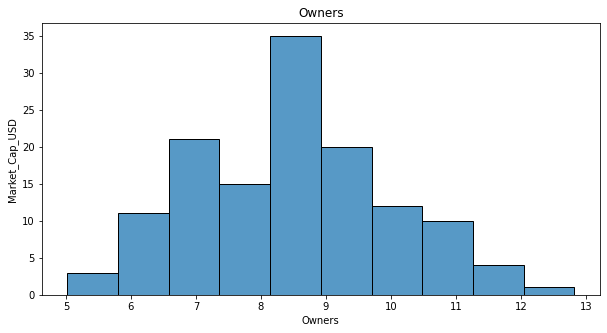

In [40]:
plt.figure(figsize=(10,5))
plt.title('Owners')
plt.xlabel('Owners'); plt.ylabel('Market_Cap_USD')
ax = sns.histplot(nft['Market_Cap_USD'])

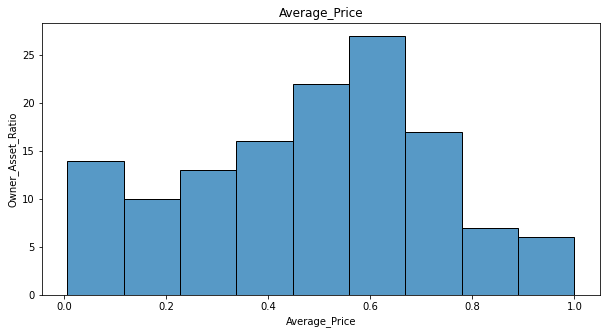

In [41]:
plt.figure(figsize=(10,5))
plt.title('Average_Price')
plt.xlabel('Average_Price'); plt.ylabel('Owner_Asset_Ratio')
ax = sns.histplot(nft['Owner_Asset_Ratio'])

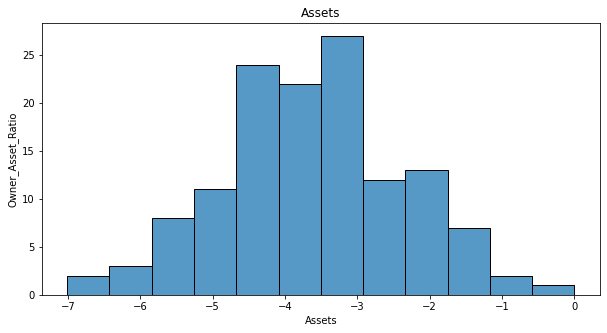

In [42]:
plt.figure(figsize=(10,5))
plt.title('Assets')
plt.xlabel('Assets'); plt.ylabel('Owner_Asset_Ratio')
ax = sns.histplot(nft['Assets'])

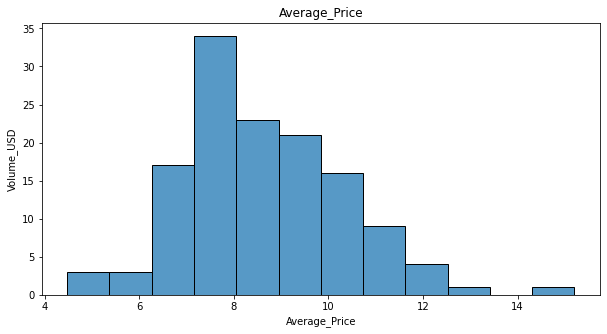

In [43]:
plt.figure(figsize=(10,5))
plt.title('Average_Price')
plt.xlabel('Average_Price'); plt.ylabel('Volume_USD')
ax = sns.histplot(nft['Volume_USD'])

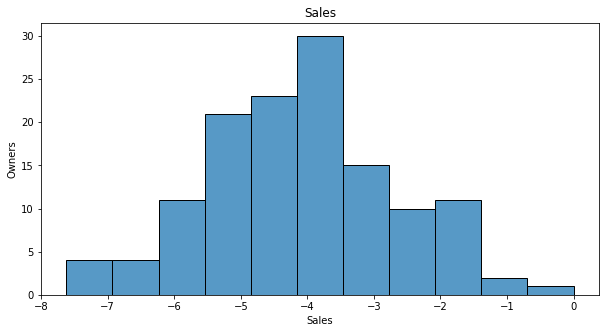

In [44]:
plt.figure(figsize=(10,5))
plt.title('Sales')
plt.xlabel('Sales'); plt.ylabel('Owners')
ax = sns.histplot(nft['Owners'])

Больших зависимостей с этих графиков особо нет, значит все хорошо

In [45]:
# Смотрим, чтоб не было колонок, которые не числовые

In [46]:
nft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 581
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              132 non-null    int64  
 1   Name               132 non-null    object 
 2   Volume_USD         132 non-null    float64
 3   Market_Cap_USD     132 non-null    float64
 4   Sales              132 non-null    float64
 5   Floor_Price_USD    132 non-null    float64
 6   Average_Price_USD  132 non-null    float64
 7   Owners             132 non-null    float64
 8   Assets             132 non-null    float64
 9   Owner_Asset_Ratio  132 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 11.3+ KB


In [47]:
# Удаляем эти ненужные уже нам колонки

In [48]:
nft3 = nft # Для кластеризации
nft = nft.drop(columns = ["Name"],axis =1)
nft = nft.drop(columns = ["Index"],axis =1)
nft3 = nft3.drop(columns = ["Index"],axis =1) # не удалили колонку name, чтобы сопоставить потом имя набора NFT и класетры, в которые они попадут

In [49]:
nft

,Volume_USD,Market_Cap_USD,Sales,Floor_Price_USD,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
0,15.202259,11.551857,-2.610552,-1.436048,0.000000,-5.136289,-5.335131,0.7500
5,12.963293,12.825529,-1.261131,-4.930028,-3.588387,-1.225934,-1.012656,0.4967
9,12.509220,11.886398,-1.460464,-4.873332,-3.843127,-1.691606,-1.641575,0.5848
12,12.361256,11.258019,-2.492162,-5.112349,-2.959393,-2.128134,-2.139013,0.6215
13,12.109110,10.489186,-2.599682,-4.713573,-3.104019,-3.026075,-3.263533,0.7795
...,...,...,...,...,...,...,...,...
562,6.180095,7.049133,-5.948236,-6.721787,-5.684481,-4.730823,-4.673733,0.5806
569,5.963767,6.399085,-6.115290,-6.721787,-5.733754,-5.056246,-5.274507,0.7647
578,4.989207,7.554157,-8.513185,-5.112349,-4.310419,-7.621195,-5.542771,0.0769
579,4.989207,6.766981,-6.028279,-7.520295,-6.795325,-3.729375,-3.845040,0.6901


In [50]:
# Расчитываем евклидово расстояние

In [51]:
euclide = euclidean_distances(nft,nft)

In [52]:
# Выводим в нормальном виде

In [53]:
df = pd.DataFrame(euclide)
df

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,0.000000,8.220669,7.797892,7.051633,6.310266,11.257290,8.083051,12.685423,8.729753,7.128480,...,13.061947,13.225932,13.318906,12.933648,13.555767,13.179416,13.601811,13.924617,15.042613,14.465243
1,8.220669,0.000000,1.347643,2.619554,4.080226,4.251217,4.663315,5.347480,3.121791,5.785319,...,11.945317,11.355184,11.717735,10.068582,13.020848,11.603717,12.432815,14.356803,12.423313,12.046523
2,7.797892,1.347643,0.000000,1.660908,2.903683,3.905457,3.374208,5.184753,2.282798,4.490720,...,10.746623,10.169863,10.516543,9.036498,11.807705,10.432414,11.232256,13.265466,11.329814,11.221901
3,7.051633,2.619554,1.660908,0.000000,1.715224,4.853835,3.023835,6.065123,1.912447,3.566770,...,9.769529,9.385861,9.682711,8.264035,10.877618,9.543731,10.313933,12.173725,10.630731,10.371010
4,6.310266,4.080226,2.903683,1.715224,0.000000,5.655206,2.278120,6.997720,2.819968,2.027657,...,8.729786,8.447281,8.691262,7.688994,9.718489,8.592211,9.271889,11.076780,9.932135,9.984348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,13.179416,11.603717,10.432414,9.543731,8.592211,10.452248,7.876116,11.098360,8.801205,7.030872,...,0.965402,1.193034,1.049180,2.436439,2.483953,0.000000,1.000208,4.700399,2.253318,4.828083
128,13.601811,12.432815,11.232256,10.313933,9.271889,11.256483,8.554719,11.907316,9.632797,7.622937,...,0.821914,1.708059,1.262073,3.398043,2.013315,1.000208,0.000000,4.446800,2.582007,5.439802
129,13.924617,14.356803,13.265466,12.173725,11.076780,14.186685,11.040627,15.049699,11.865022,9.666807,...,4.517204,5.411139,5.182395,6.154684,3.899938,4.700399,4.446800,0.000000,6.096879,5.671314
130,15.042613,12.423313,11.329814,10.630731,9.932135,10.739532,8.978577,11.090065,9.613192,8.518847,...,2.917133,2.399905,2.482076,2.706725,4.061387,2.253318,2.582007,6.096879,0.000000,4.734811


In [54]:
# Кластеризация методом BIRCH (Береза)

Сам метод BIRCH требует чтобы указывали количество кластеров. Выбрано именно 4, потому что опытным путем мной было выявлено, что если поставить 3 кластера, получится, что один кластер дорогих, второй кластер средних, и третий кластер дешевых NFT, это конечно тоже вариант, но с точки зрения постановки задачи требуется выделить такие кластеры NFT, в которые можно вложиться, а рынок DeFi активов гораздо более шире и разнообразней, и относительно цены(под ценой имеется ввиду капитализация) судить актив это в корне неверно. А если будет 4, то уже не так все однозначно, и выделяются такие кластеры активов, которые перед покупкой нужно проанализировать. На самом рынке DeFi активов большое влияние оказывает человеческая оценка и реклама, которая в текущем датасете не учитывается.

In [55]:
model = Birch(n_clusters = 4)
model.fit(nft)
pred = model.predict(nft)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 1, 3, 0, 0, 3, 0, 0,
       1, 0, 3, 3, 1, 0, 3, 0, 3, 3, 3, 3, 3, 1, 0, 0, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 0, 3, 0, 3, 1, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 1, 3, 3,
       1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 3, 3, 2, 3, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1])

In [56]:
# Смотрим размеры кластеров

In [57]:
np.unique(pred, return_counts = True)

(array([0, 1, 2, 3]), array([25, 31, 36, 40]))

In [58]:
nft2 = nft
nft2["cluster"] = pred
nft3["cluter"] = pred

In [59]:
pred = pd.DataFrame(pred)
pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
127,2
128,2
129,1
130,2


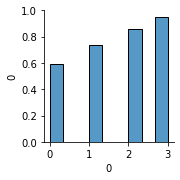

In [60]:
sns.pairplot(pred)

In [61]:
nft2.describe()

,Volume_USD,Market_Cap_USD,Sales,Floor_Price_USD,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio,cluster
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,8.624376,8.488642,-4.084859,-6.389126,-5.103576,-4.115732,-3.614376,0.481675,1.689394
std,1.737295,1.499767,1.563441,1.355085,1.263082,1.455475,1.275104,0.243800,1.099150
min,4.478382,5.020339,-8.513185,-9.024372,-7.951824,-7.621195,-7.009108,0.006200,0.000000
25%,7.374790,7.239159,-5.190073,-7.414934,-6.042181,-5.136289,-4.444158,0.322450,1.000000
50%,8.454842,8.568881,-4.182538,-6.519055,-5.030722,-4.124688,-3.585991,0.529100,2.000000
75%,9.807830,9.314990,-2.875732,-5.507357,-4.300421,-3.267834,-2.876654,0.645450,3.000000
max,15.202259,12.825529,0.000000,-1.436048,0.000000,0.000000,0.000000,1.000000,3.000000


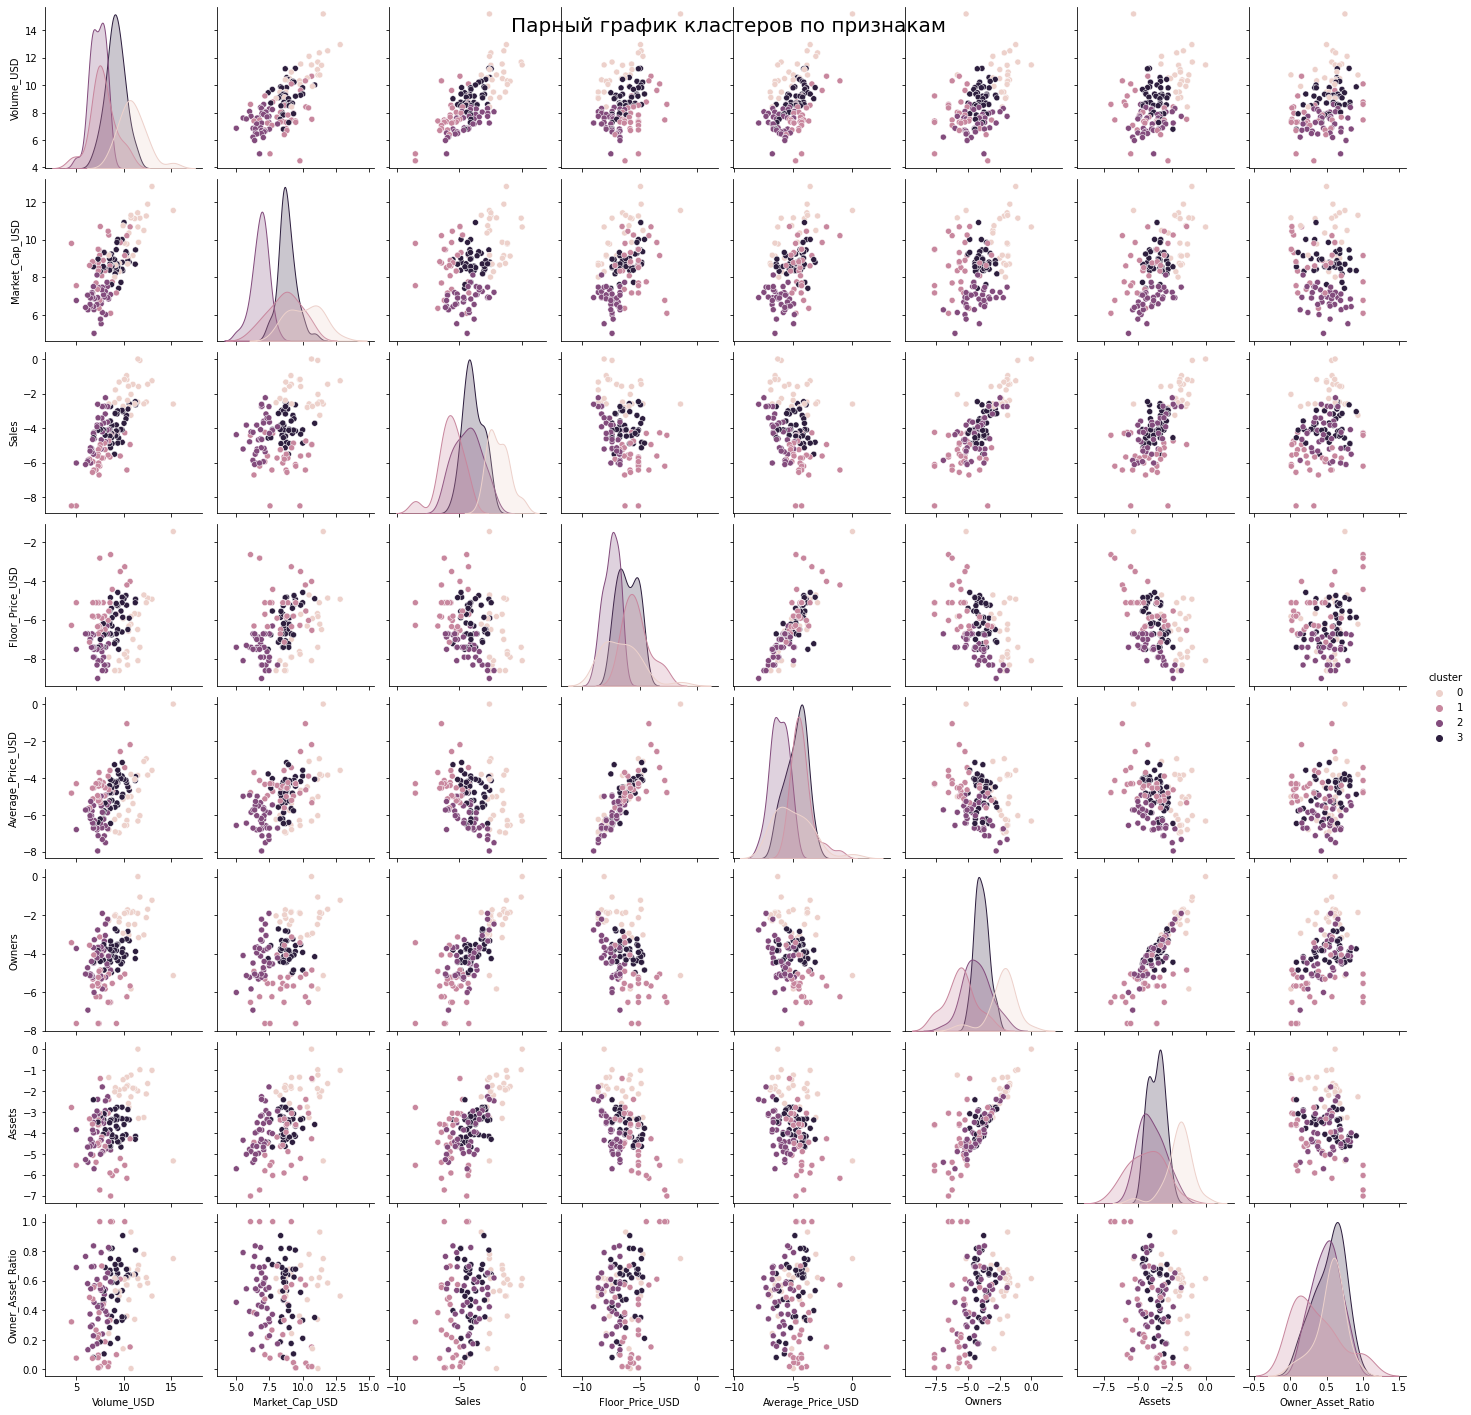

In [62]:
sns.pairplot(nft2, hue = "cluster")

plt.suptitle('Парный график кластеров по признакам', 
             size = 20);

In [63]:
clusters_table = pd.pivot_table(nft2, index=['cluster'])
clusters_table

,Assets,Average_Price_USD,Floor_Price_USD,Market_Cap_USD,Owner_Asset_Ratio,Owners,Sales,Volume_USD
cluster,,,,,,,,
0,-1.995077,-5.018941,-6.636669,10.169742,0.543108,-2.318503,-1.894880,10.898990
1,-4.414388,-4.303419,-5.303141,8.652527,0.357858,-5.581689,-5.738183,7.771209
2,-3.989510,-6.205366,-7.500806,6.803033,0.490553,-4.306992,-4.356810,7.250635
3,-3.668810,-4.784983,-6.075537,8.827992,0.531247,-3.930749,-3.927514,9.100314


В первый кластер вошли nft у которых большая рыночная капитализация и где nft популярны у пользователей, но их нечасто покупают, так как если собирать всю коллекцию достаточно дорого, и сами nft достаточно дорогие
Во второй кластер вошли достаточно недорогие, но достаточно покупаемые в прошлом nft, их скорее всего скоро будут продавать, поэтоу на короткий срок их покупать можно, главное не передержать, что собственно и говорит показатель продаж по датасету
В третий кластер вошли nft, которые не очень известны, или не стоят большого внимания, потому что их капитализация самая низка, но в тоже время, достаточно много продаж и самый высокий уровень заинтересованности у пользователей, я бы не рекомендовал вкладываться в NFT из данного набора, но парочку на очень короткий срок я бы рекомендовал купить
в четвертый кластер вошли nft, которые имеют малую коллекцию, из-за этого минимальная цена выше че у остальных nft, и пользователи не предпочитают nft из этого кластера, продажи этих крооекций достаточно посредственны, поэтому крайне не рекомендую nft из этого кластера

In [64]:
# Смотрим названия NFT, которые находятся в кластерах

In [65]:
cluster_0 = nft3.loc[nft3['cluter'] == 0.0]
cluster_0.Name.unique()

array(['basis.markets', "I'M AIKO", 'Meta Waifus', 'Hot Bunnies NFT',
       'BOSS BULLS ™ CLUB', 'PixTapes', 'Genesis Zombies', 'Solameleon',
       "SOL NFL Player's", 'WOOFers', 'SolSheep', 'SOLEX S2 Mystery Box',
       'ALL.ART CIRCLE', 'Solana Sluts', 'Billionaire Whale Club',
       'Faceless NFT', 'Gangster Gorillas', 'Crypto Coves',
       'Crypto Captains', 'Baffled Bears', 'Gapes on Sol',
       'Moolah Monkeys', 'Dynamic Shields', 'Solworms', 'Crypto Carz'],
      dtype=object)

In [66]:
cluster_1 = nft3.loc[nft3['cluter'] == 1.0]
cluster_1.Name.unique()

array(['Lo Sciamano', 'Shapes of Reality', 'DazedDucks', 'Invictus Owls',
       'TamaKo - Origins', 'Point Of Departure ', 'HalászÚr ',
       'Investor Whale', "The 50's Kid", 'MetaLand', 'GALAXXIA',
       'ThePocketBitcoinBand', 'Moshed Ape Club', 'Digital Ducklings',
       'Bud Head Hood Girls', 'Kreechures', 'Culture Of Women',
       'Real Deal Xmas 2021 ', 'Sol Zombie NFT', 'SamurAI',
       'Leonardo Glauso', 'Yuki', 'SOL CASH NFT', 'Pug Party',
       'Mowjood Snapback', 'PsychedelicCreatures', 'Bud Head Community',
       'Angry Charlie', 'Gods Of Solana', 'Cannababy Society',
       'SolNFTPad'], dtype=object)

In [67]:
cluster_2 = nft3.loc[nft3['cluter'] == 2.0]
cluster_2.Name.unique()

array(['PixMonkies', 'Angry Armadillos', 'Soloth Street Club',
       'Cryptomost: Fanclub', 'Solanauts', 'RoyalSnakes Club',
       'Banana Solana', 'CatFamily', 'NFIT Social Club', 'SolNauts',
       'Alchemy Bugs', 'Subway Skaters', 'BabySpartan Flamingo',
       'Sol Cat @Lilbaksik', 'SOLENFORCERS', 'Starbase', 'HiveKeepers',
       'Pyramids', 'Bladius', 'Fantasy Beach Club', 'The Mighty Veggies',
       'CyberGothica — GEN#1', 'Generous Giraffes', 'SolKitty Family',
       'SOLDOGES NFT', 'The Solarians', 'Strange Punks', 'Ghostly Sols',
       'Lion Punks', 'Zombie Doges', 'PABLO PUNKS', 'Solbots',
       ' Surreal Genesis ', 'Cryptography Punks', 'META OCEAN BOX',
       'Mountain Lionz'], dtype=object)

In [68]:
cluster_3 = nft3.loc[nft3['cluter'] == 3.0]
cluster_3.Name.unique()

array(['Dope Apes', 'Cryo Pass - SU ', 'Pixel Invaderz',
       'Aliens VS People', 'OG Astro Babies', 'Meta Panda Squad',
       "Women's Pride", 'Stranded Unicorns ', 'Art by Keen',
       'Crypto Worms', 'Solar Heroes', 'Drakos Unchained ™',
       'Verse of Death ', 'Ancient Soluments', 'Danerob', 'Sol Bit Stars',
       'Multiverse Llama', 'Elite Legion', 'Goofy Dracula ',
       'Sol Vikings', 'Social Donkeys', 'Flashy Flamingos',
       'Moolah Monkey Club', 'Sol Kitties', 'GEMSkulls', 'UNQ Universe',
       'Cubist Animals', 'PsyShrooms', 'SolaJump NFT Game', 'Silly Seals',
       'Sea Rovers', 'Cryptonic Creations', 'Rogue Pandas',
       'Shuffle Sharks', 'Ben the Robot', 'Ape Punks',
       'PonderMonsterHotties', 'Corona Pixus', 'Space Sharks',
       'NFT Mint Watch'], dtype=object)

# КЛАССИФИКАЦИЯ

In [89]:
data = nft2.sample(frac=1)
X = data[['Volume_USD', 'Market_Cap_USD', 'Sales', 'Floor_Price_USD', 'Average_Price_USD', 'Owners', 'Assets','Owner_Asset_Ratio']]
y = data['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



In [90]:
def mae(y_test, y_pred): # Функция вычисления средней абсолютной ошибки
    return np.mean(abs(y_test - y_pred))

def fit_and_evaluate(model): # Вводит модель, обучает и оценивает ее на тестовом наборе
    
    model.fit(X_train, y_train) # Обучаем модель
    
    model_pred = model.predict(X_test) # Делаем прогноз и оцениваем
    model_mae = mae(y_test, model_pred)
    
    
    return model_mae # Возвращаем оценку модели

In [91]:
knn = KNeighborsClassifier(n_neighbors=5) # Реализация метода ближайших соседей
knn_mae = fit_and_evaluate(knn)

print('KNeighborsClassifier Performance on the test set: MAE = %0.4f' % knn_mae)

KNeighborsClassifier Performance on the test set: MAE = 0.3500


In [92]:
svm = SVC(kernel='linear') # Реализация метода опорных векторов (Попробовать poly вместо linear)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Performance on the test set: MAE = 0.3000


In [93]:
random_forest_cl = RandomForestClassifier(n_estimators=20) # Метод случайного леса
random_forest_cl_mae = fit_and_evaluate(random_forest_cl)

print('Random Forest Classifier Performance on the test set: MAE = %0.4f' % random_forest_cl_mae)

Random Forest Classifier Performance on the test set: MAE = 0.1500


В данной прогонке лучше всех показал себя метод случайного леса, и чаще всего он был лучшим

Добавим еще один NFT и предскажем его кластер

In [94]:
Volume_USD = 4.69
Market_Cap_USD = 14.5
Sales = -4.01
Floor_Price_USD = -1.04
Average_Price_USD = -1.35
Owners = -6.66
Assets = -1.68
Owner_Asset_Ratio = 0.71

model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)
new_nft = model.predict([[Volume_USD, Market_Cap_USD, Sales, Floor_Price_USD, Average_Price_USD, Owners, Assets, Owner_Asset_Ratio]])
new_nft

/home/ivan/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

Посмотрим, какие признаки важны для определения кластера

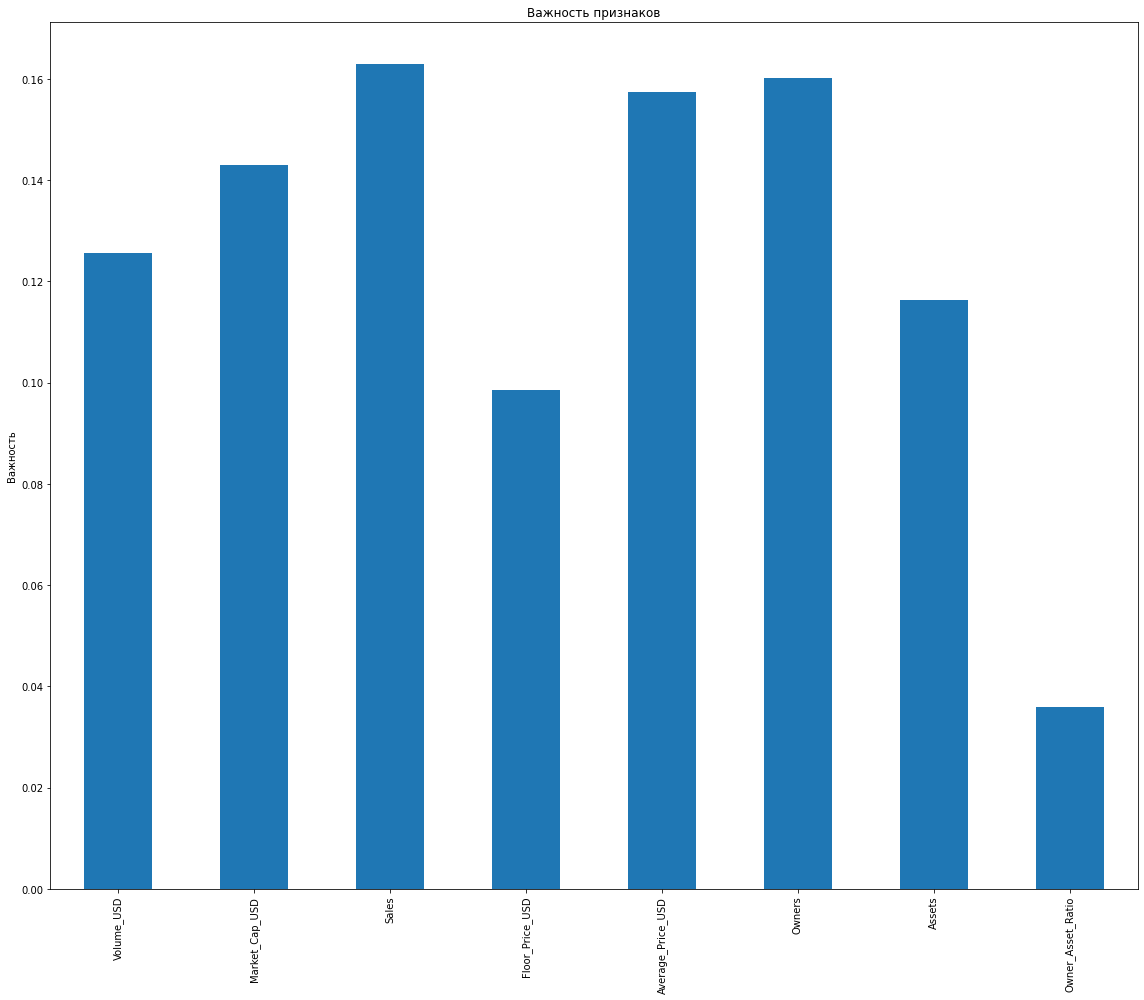

In [95]:
random_forest_cl = RandomForestClassifier(n_estimators=20)
random_forest_cl.fit(X_train, y_train)
random_forest_cl_imp = pd.Series(random_forest_cl.feature_importances_,
                         X_train.columns)

fig, ax = plt.subplots(figsize=(16,14))
random_forest_cl_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

Наибольшее влияние при определении кластера в группу определяет не один какой-то признак, а их совокупность

# Вывод

Решив задачу кластеризации, нам удалось выделить NFT, в которые стоит инвестировать, а в какие нет, какие имет потенциал роста, и какие не совсем. При решении задачи классификации мы предсказываем кластер для NFT, который в теории может быть добавлен на coinmarketcap. И подводя итог, можно происследовать новые NFT, которые "залисчены" уже на сегодня,определить их кластер и стратегию инвестирования.